# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop
for city in cities:  
    
    # Try statement to append calls
    try: 
        response = requests.get(f"{base_url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
      

        record= record + 1 
        
    # If no record found "skip" to next call
    except:
        print("Missing field/result... skipping.")
    continue

Beginning Data Retrieval
-------------------------------
Missing field/result... skipping.
Processing Record 1 | Jamestown
Processing Record 2 | Cap Malheureux
Processing Record 3 | Lorengau
Processing Record 4 | Barrow
Processing Record 5 | Hasaki
Processing Record 6 | Port Alfred
Processing Record 7 | Saskylakh
Processing Record 8 | Avarua
Processing Record 9 | Nikolskoye
Processing Record 10 | Hermanus
Processing Record 11 | Georgetown
Processing Record 12 | Hilo
Processing Record 13 | Vaini
Processing Record 14 | Vila Franca do Campo
Processing Record 15 | Bluff
Processing Record 16 | Mont-de-Marsan
Processing Record 17 | Kyren
Processing Record 18 | Luena
Processing Record 19 | Jadu
Processing Record 20 | Cabo San Lucas
Processing Record 21 | Dunedin
Processing Record 22 | Tasiilaq
Processing Record 23 | Kodiak
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record 24 | Busselton
Processing Record 25 | Ushuaia
Processing Record 26 | Puerto Ayora
Proc

Processing Record 224 | Geraldton
Processing Record 225 | Kyabe
Processing Record 226 | Kalamazoo
Missing field/result... skipping.
Processing Record 227 | Moyale
Processing Record 228 | Derzhavinsk
Processing Record 229 | Lamu
Processing Record 230 | Alofi
Processing Record 231 | Buraydah
Processing Record 232 | Tabas
Processing Record 233 | Novaya Igirma
Processing Record 234 | Luba
Processing Record 235 | Norman Wells
Processing Record 236 | Sur
Processing Record 237 | Alice Springs
Processing Record 238 | Chapais
Processing Record 239 | Pekalongan
Processing Record 240 | Coahuayana
Processing Record 241 | Ribeira Grande
Processing Record 242 | Nikolsk
Processing Record 243 | Da Lat
Processing Record 244 | Avera
Processing Record 245 | Inuvik
Processing Record 246 | Auki
Processing Record 247 | Nakhon Thai
Processing Record 248 | Awjilah
Processing Record 249 | Havoysund
Processing Record 250 | Preobrazheniye
Processing Record 251 | Vasteras
Processing Record 252 | Santa Maria
Proce

Processing Record 454 | Chake Chake
Processing Record 455 | Greenwood
Processing Record 456 | Klichka
Processing Record 457 | Pangnirtung
Processing Record 458 | Vilshofen
Processing Record 459 | Mariestad
Processing Record 460 | Bakchar
Processing Record 461 | North Platte
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record 462 | Acapulco
Processing Record 463 | Camacha
Processing Record 464 | Itarema
Processing Record 465 | Kibala
Processing Record 466 | Omboue
Processing Record 467 | Podporozhye
Processing Record 468 | Sibolga
Processing Record 469 | Ulaanbaatar
Processing Record 470 | Tecoanapa
Processing Record 471 | Bemidji
Processing Record 472 | Jumla
Processing Record 473 | Wajir
Missing field/result... skipping.
Processing Record 474 | Charleville
Processing Record 475 | Soyo
Processing Record 476 | Kautokeino
Processing Record 477 | Maragogi
Processing Record 478 | Khulo
Processing Record 479 | Trelew
Processing Record 480 | Oranjemund
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating dictionary
column_names = {"City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

In [6]:
# Creating Dataframe
weather_data = pd.DataFrame(column_names)

weather_data.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [7]:
# Saving to a CSV file
weather_data.to_csv('weatherdf_CSV.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,0,AU,1539316187,44,-33.21,138.60,72.45,5.50
1,Cap Malheureux,40,MU,1539313200,64,-19.98,57.61,73.40,16.11
2,Lorengau,32,PG,1539316436,92,-2.02,147.27,86.67,10.54
3,Barrow,92,AR,1539316436,47,-38.31,-60.23,51.26,6.85
4,Hasaki,75,JP,1539314280,88,35.73,140.83,68.00,8.05


In [8]:
time.strftime("%Y-%m-%d")

'2018-10-11'

In [9]:
datetime.fromtimestamp(1539143760)

datetime.datetime(2018, 10, 9, 23, 56)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

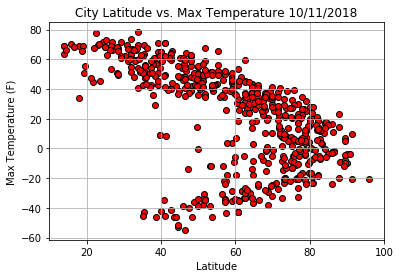

In [17]:
y_axis = weather_data['Max Temp']
x_axis = weather_data['Lat']


plt.scatter(y_axis, x_axis, c='red', edgecolors='black', alpha=1)

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.grid(True)

plt.savefig("Images/LatitudeVsMaxTemperature.png")


#### Latitude vs. Humidity Plot

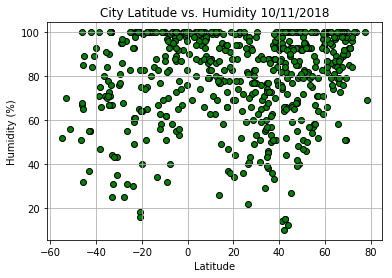

In [21]:
x_axis = weather_data['Lat']
y_axis = weather_data['Humidity']

plt.scatter(x_axis, y_axis, c='green', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Images/LatitudeVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

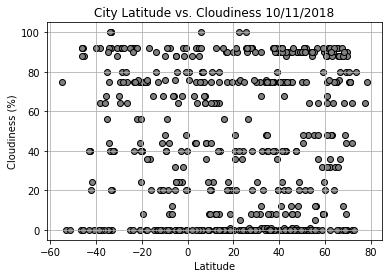

In [18]:

x_axis = weather_data['Lat']
y_axis = weather_data['Cloudiness']

plt.scatter(x_axis, y_axis, c='grey', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Images/LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

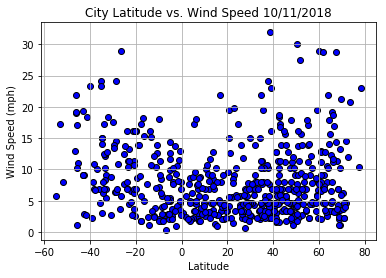

In [20]:
x_axis = weather_data['Lat']
y_axis = weather_data['Wind Speed']

plt.scatter(x_axis, y_axis, c='blue', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Images/LatitudeVsWindSpeed.png")
plt.show()